In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train_agriculture.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.shape

(88858, 10)

There are 88858 rows and 10 columns

In [4]:
len(df["ID"].unique())

88858

ID is unique => it can be set as index

In [5]:
# Setting ID as index

df = df.set_index(df["ID"])
df.drop("ID",axis=1,inplace=True)
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0.0,0,1,0
F00000003,209,1,0,1,0,0.0,0,2,1
F00000004,257,1,0,1,0,0.0,0,2,1
F00000005,257,1,1,1,0,0.0,0,2,1
F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

All the columns are of numerical data type

In [7]:
df["Crop_Damage"].unique()

array([0, 1, 2], dtype=int64)

class 0 - alive/no damage

class 1 - damage due to other causes

class 2 - damage due to pesticides

In [8]:
# Checking for null values

df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

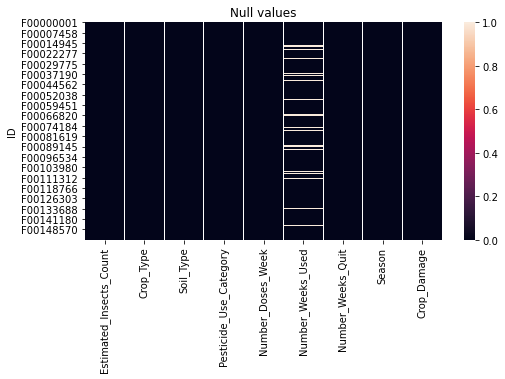

In [9]:
# Visualizing null values using heatmaps

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There are many null values in the Number_weeks_used column

In [10]:
# Imputing with mean

df["Number_Weeks_Used"]=df["Number_Weeks_Used"].replace(np.nan,df["Number_Weeks_Used"].mean())
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

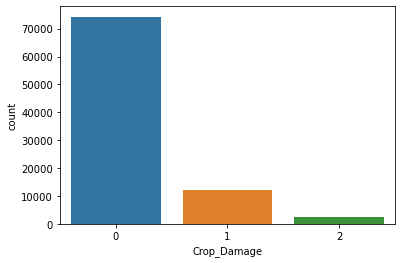

In [11]:
# Univariate analysis

# Crop_Damage

sns.countplot(df["Crop_Damage"])
plt.show()

Most of the crops suffer no damage, we also see that damage due to pesticides is less likely to happen.

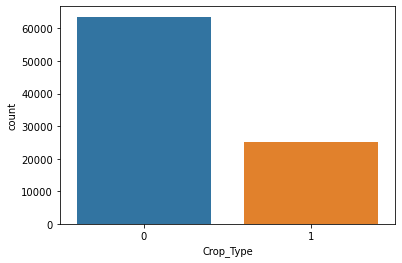

In [12]:
# Crop_type

sns.countplot(df["Crop_Type"])
plt.show()

Most of the crops are of ctaegory 0

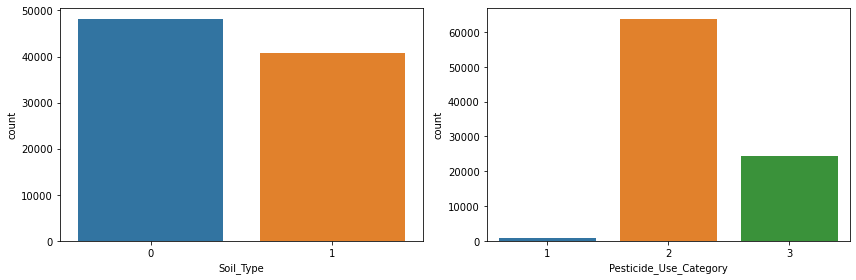

In [13]:
# soil type and pesticide use category

d=df[['Soil_Type','Pesticide_Use_Category']]
c = d.columns.values

plt.figure(figsize=(12,4))
for i in range(len(c)):
    plt.subplot(1,2,i+1)
    sns.countplot(d[c[i]])
    plt.tight_layout()

Soil type: more crops are grown in soil type 0
    
Pesticide use categoy: Most of the crops are previously treated by pesticides

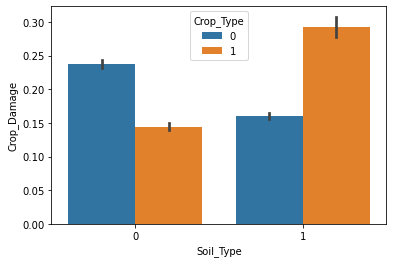

In [14]:
# Bivariate analysis

# Soil type vs crop damage

sns.barplot(x=df["Soil_Type"],y=df["Crop_Damage"],hue=df["Crop_Type"])
plt.show()

soil type1 along with crop type1 corresponds to higher crop damage

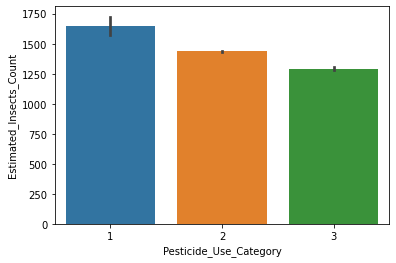

In [15]:
# pesticide used categoory vs estimated insect count 

sns.barplot(df["Pesticide_Use_Category"],df["Estimated_Insects_Count"])
plt.show()

Category 3 corrsponds to lowest insect count

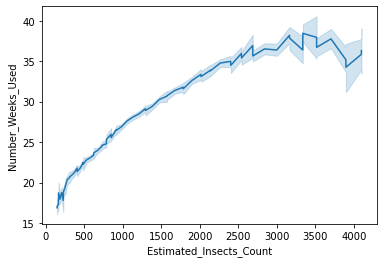

In [16]:
#  estimated insect count vs weeks used

sns.lineplot(df["Estimated_Insects_Count"],df["Number_Weeks_Used"])
plt.show()

As the insect count increases the number of weeks used also increases

In [17]:
# Correlation

df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


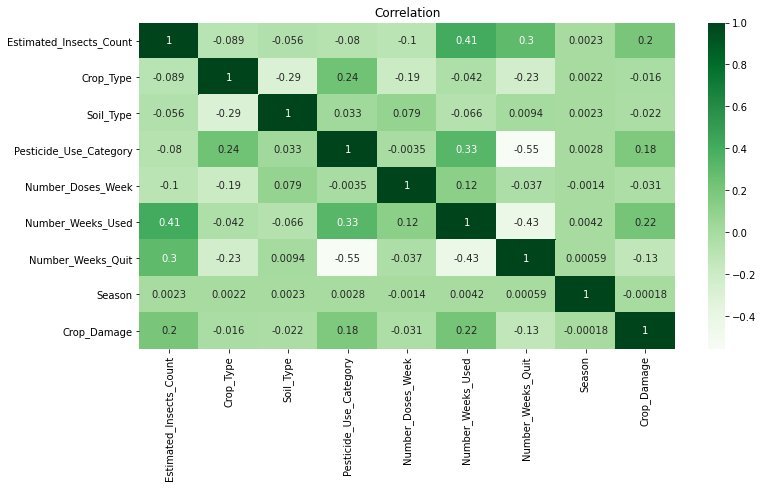

In [18]:
# Visualizing correlation with heatmap

plt.figure(figsize=(12,6))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

The target variable has weak positive correlation with estimated insect counts, pesticide category and number of weeks used and does not have any significant correlation with any independent variables.

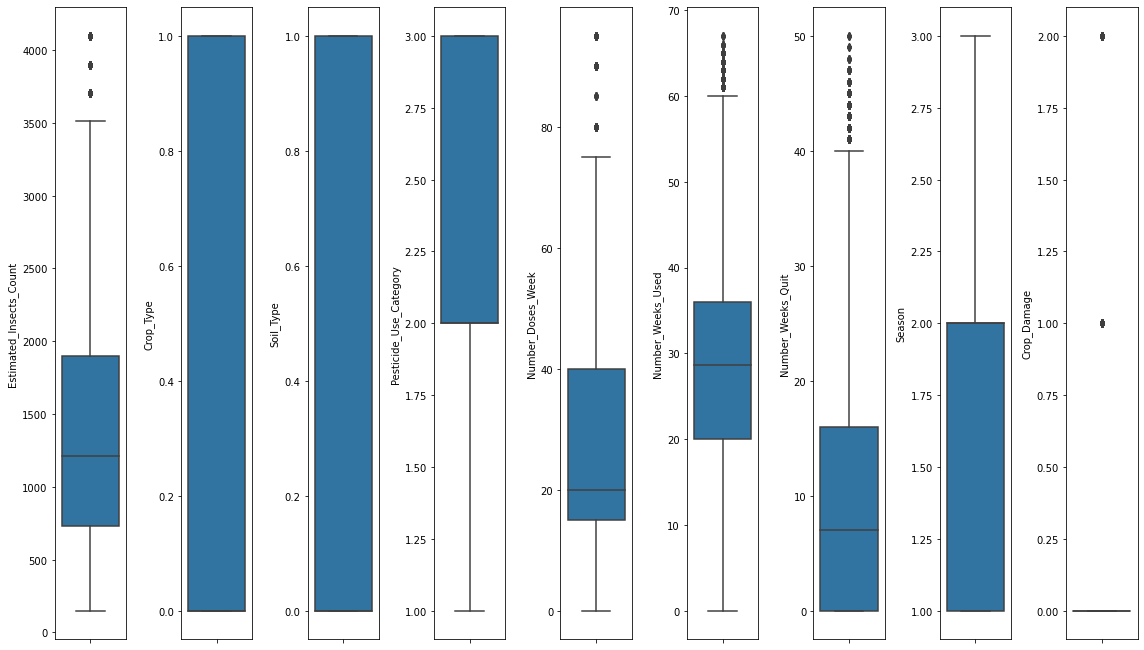

In [19]:
# Checking for outliers

collist = df.columns.values
ncol = 9
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

In [20]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0.0,0,1,0
F00000003,209,1,0,1,0,0.0,0,2,1
F00000004,257,1,0,1,0,0.0,0,2,1
F00000005,257,1,1,1,0,0.0,0,2,1
F00000006,342,1,0,1,0,0.0,0,2,1


In [21]:
df.shape

(88858, 9)

In [22]:
df_new.shape

(84853, 9)

In [23]:
df_new["Crop_Damage"].unique()

array([0, 1], dtype=int64)

removing outliers results in the loss of entire class 2 in crop_damage 

=> Outliers consist of relavent data for the crop damage to be classifiued as class 2

=> we continue with the dataset with outliers

In [24]:
# Splitting independent variables and target

x = df.drop('Crop_Damage',axis=1)
print(x.head())
y = df[['Crop_Damage']]
print("\n")
print(y.head())

           Estimated_Insects_Count  Crop_Type  Soil_Type  \
ID                                                         
F00000001                      188          1          0   
F00000003                      209          1          0   
F00000004                      257          1          0   
F00000005                      257          1          1   
F00000006                      342          1          0   

           Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
ID                                                                        
F00000001                       1                  0                0.0   
F00000003                       1                  0                0.0   
F00000004                       1                  0                0.0   
F00000005                       1                  0                0.0   
F00000006                       1                  0                0.0   

           Number_Weeks_Quit  Season  
ID            

In [25]:
# Skewness

x.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
dtype: float64

In [26]:
for i in x.columns:
    if x[i].skew() > 0.55:
        x[i]=np.sqrt(x[i])
        
x.skew()

Estimated_Insects_Count    0.233920
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.589801
Number_Doses_Week          0.057880
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.015768
Season                     0.145228
dtype: float64

In [27]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7
0,-1.940906,1.586343,-0.920021,-3.325754,-3.123897,-2.436601,-1.25114,-1.278962
1,-1.874962,1.586343,-0.920021,-3.325754,-3.123897,-2.436601,-1.25114,0.146924
2,-1.735701,1.586343,-0.920021,-3.325754,-3.123897,-2.436601,-1.25114,0.146924
3,-1.735701,1.586343,1.086932,-3.325754,-3.123897,-2.436601,-1.25114,0.146924
4,-1.517926,1.586343,-0.920021,-3.325754,-3.123897,-2.436601,-1.25114,0.146924


In [28]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
model = [GaussianNB(),SVC(),SVC(kernel='linear'),SVC(kernel='poly'),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.8237768336943984
accuracy score of GaussianNB() is
0.8220796758946658
[[13960   882     0]
 [ 1799   649     0]
 [  283   198     1]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     14842
           1       0.38      0.27      0.31      2448
           2       1.00      0.00      0.00       482

    accuracy                           0.82     17772
   macro avg       0.75      0.40      0.41     17772
weighted avg       0.81      0.82      0.80     17772



0.842303688489998
accuracy score of SVC() is
0.8411546252532073
[[14715   127     0]
 [ 2214   234     0]
 [  383    99     0]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     14842
           1       0.51      0.10      0.16      2448
           2       0.00      0.00      0.00       482

    accuracy                           0.84     17772
   macro avg       0.45      0.36      0.36     17772
weighted avg       0.78    

The SVC model with rbf(default) kernel has highest accuracy

In [38]:
# cross_val_score

svc=SVC()

from sklearn.model_selection import cross_val_score

print("Cross_val_score for",svc ,'is ',cross_val_score(svc,x,y,cv=5).mean())

Cross_val_score for SVC() is  0.841668721910897


cross_val_score does not indicate overfitting

In [39]:
# saving the model

import joblib
joblib.dump(SVC(),'svc_agriculture.csv')

['svc_agriculture.csv']

In [40]:
# Preparing the test data

df1 = pd.read_csv("test_agriculture.csv")
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [42]:
# Setting ID as index

df1 = df1.set_index(df1["ID"])
df1.drop("ID",axis=1,inplace=True)
df1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
ID,,,,,,,,
F00000002,188,1,1,1,0,NaN,0,2
F00000007,410,1,1,1,0,0.0,0,2
F00000011,626,1,0,1,0,0.0,0,2
F00000013,731,1,0,1,0,0.0,0,2
F00000014,789,0,0,1,0,0.0,0,1


In [45]:
df1.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [46]:
df1.shape

(1199, 8)

There are 1199 entries for which the target needs to be predicted

In [47]:
# checking for null values

df1.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [49]:
# Imputing with mean

df1["Number_Weeks_Used"]=df1["Number_Weeks_Used"].replace(np.nan,df1["Number_Weeks_Used"].mean())
df1.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [54]:
# Skewness

df1.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [55]:
for i in df1.columns:
    if df1[i].skew() > 0.55:
        df1[i]=np.sqrt(df1[i])
        
df1.skew()

Estimated_Insects_Count    0.481273
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.149741
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.391417
Season                     0.155872
dtype: float64

In [57]:
# Loading the model

joblib_model = joblib.load('svc_agriculture.csv')
joblib_model

SVC()

In [60]:
# Using the loaded model

joblib_model.fit(x_train,y_train)
y_pred = joblib_model.predict(df1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
predicted_class = pd.DataFrame(y_pred)
predicted_class

,0
0,0
1,0
2,0
3,0
4,0
...,...
1194,0
1195,0
1196,0
1197,0
